In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

C:\Users\leroy\AppData\Local\Temp\ipykernel_12372\1557228250.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Importing the dataset
white_wine_data=pd.read_csv('wine+quality/winequality-white.csv',sep=';')
red_wine_data=pd.read_csv('wine+quality/winequality-red.csv',sep=';')

print(white_wine_data.shape)
print(red_wine_data.shape)

(4898, 12)
(1599, 12)


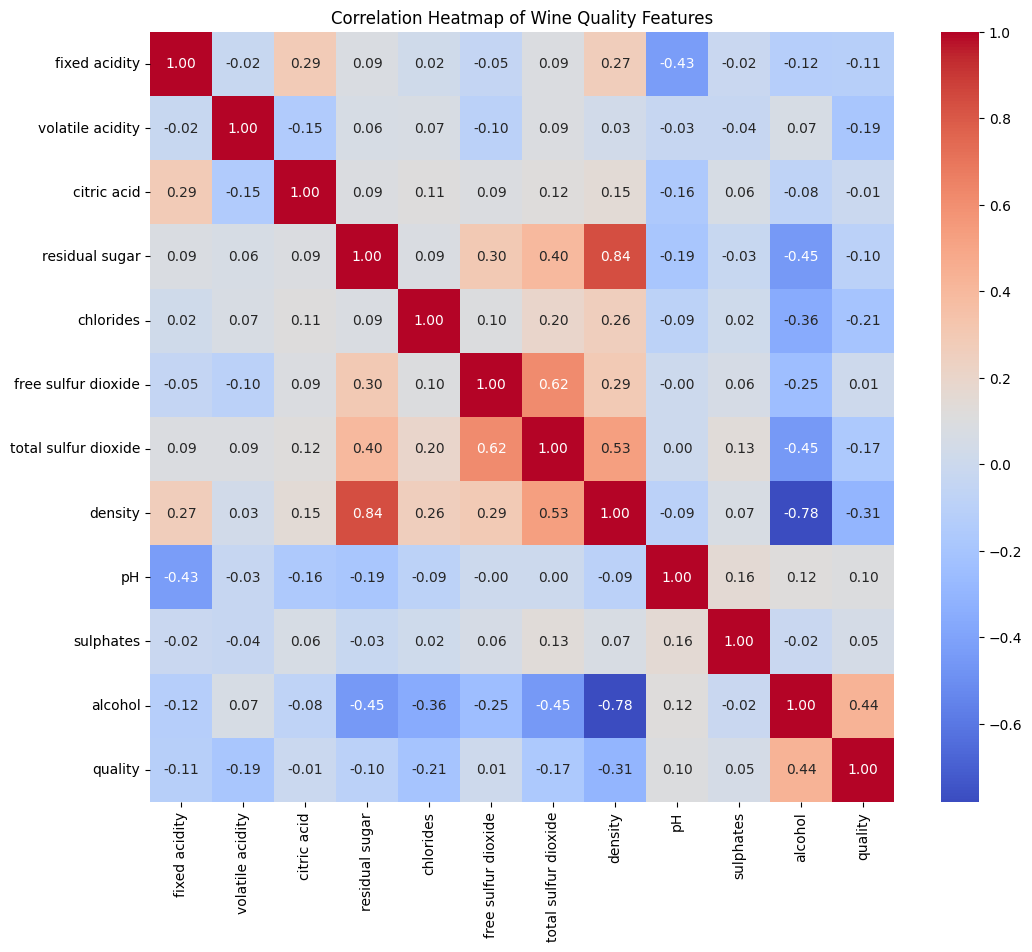

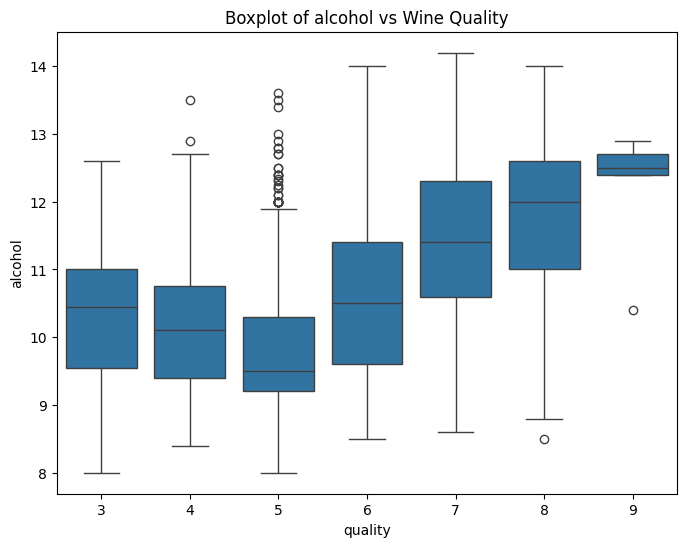

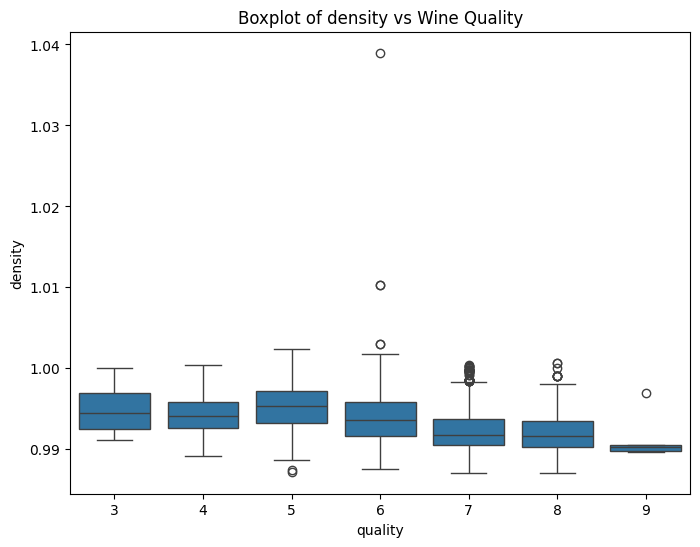

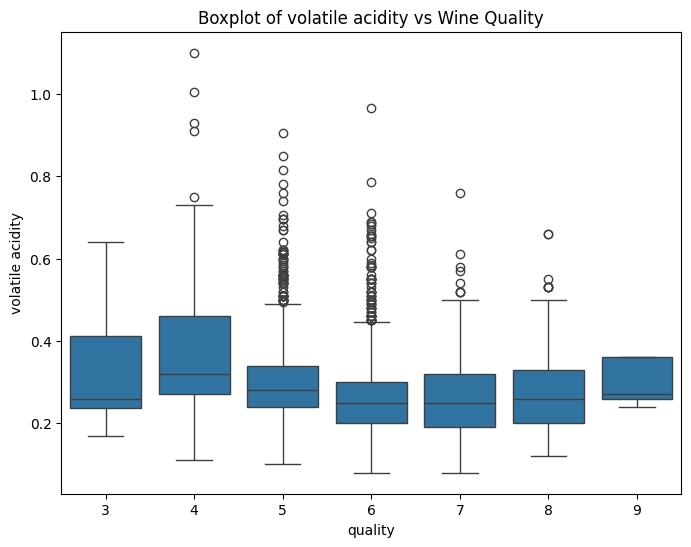

In [3]:
##Question 3

#calculate correlations
correlation_matrix = white_wine_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Quality Features')
plt.show()

# Selecting features with higher correlation for boxplot visualization
# Based on the heatmap, we might select alcohol, density, and volatile acidity for a closer look
features_to_plot = ['alcohol', 'density', 'volatile acidity']
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=feature, data=white_wine_data)
    plt.title(f'Boxplot of {feature} vs Wine Quality')
    plt.show()



In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

##EXO 5

# Split the dataset into features (X) and target variable (y)
X = white_wine_data.drop('quality', axis=1)
y = white_wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a random forest regressor model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model using different metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score:", r2)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importances
print("\nFeature Importances:")
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importances[i]}")



Mean Squared Error (MSE): 0.3496964285714286
Mean Absolute Error (MAE): 0.4203367346938775
R-squared Score: 0.5484718420444096

Feature Importances:
alcohol: 0.23965416319661842
volatile acidity: 0.12474986315392382
free sulfur dioxide: 0.11689680753080679
pH: 0.07157875409538757
total sulfur dioxide: 0.06852628489285408
residual sugar: 0.06848891622606011
fixed acidity: 0.06528720367166362
chlorides: 0.06206507378782133
sulphates: 0.061951207599445085
density: 0.061207261430848724
citric acid: 0.05959446441457043


In [8]:
import shap

# Calculate Shapley values
explainer = shap.Explainer(rf_model)
shap_values = explainer(X_test)

# Create a force plot for a specific instance
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


ValueError: visualize() can only display Explanation objects (or arrays of them)!